## Final Exam WQD 7005 Data Mining 
## Question 5

### Name: Nurullainy binti Mat Rashid                   
### ID :  17036591

### Topic: Density-Based Clustering with PCA of Internet Movie Database (IMDb)

The objectives are to implement density-based clustering using data from IMDb. The data was collected from the following website : https://www.imdb.com/search/title/?year=2017


In order to achieve the task, I will be going to cover the following steps:

    1) Importing required libraries
    2) Load the dataset (Question 1)  into a DataFrame object
    3) Visualize the data, use only two of these attributes at the time
    4) You may need to normalise the attribute if necessary
    5) Show positive correlation between attributes if necessary
    6) Construct a density-based clustering model and extract cluster labels and outliers to plot your results


### 1) Importing required libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.neighbors import NearestNeighbors

import math

### 2) Load the dataset (Question 1)  into a DataFrame object

In [2]:
# Load dataset

df = pd.read_csv('movies_imdb_preprocessed.csv')
df.head()

,movie_name,year_released,runtime_in_min,genre,revenues,imdb_rating,user_votes,director,actor
0,Gladiator,2000,155,"Action, Adventure, Drama",187705427,8.5,1295546,Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen..."
1,Memento,2000,113,"Mystery, Thriller",25544867,8.4,1088700,Christopher Nolan,"Guy Pearce, Carrie-Anne Moss, Joe Pantoliano, ..."
2,Snatch,2000,104,"Comedy, Crime",30328156,8.3,760646,Guy Ritchie,"Jason Statham, Brad Pitt, Benicio Del Toro, De..."
3,Requiem for a Dream,2000,102,Drama,3635482,8.3,742193,Darren Aronofsky,"Ellen Burstyn, Jared Leto, Jennifer Connelly, ..."
4,X-Men,2000,104,"Action, Adventure, Sci-Fi",157299717,7.4,558716,Bryan Singer,"Patrick Stewart, Hugh Jackman, Ian McKellen, F..."


In [3]:
df.isnull().sum()

movie_name         0
year_released      0
runtime_in_min     0
genre              0
revenues           0
imdb_rating        0
user_votes         0
director          78
actor             78
dtype: int64

In [4]:
# Remove categorical data for PCA analysis

df = df.drop(['movie_name', 'genre', 'director', 'actor'], axis=1)

In [5]:
df.shape

(894, 5)

### 3) Visualize the data, use only two of these attributes at the time

Apply PCA to reduce 5 dimensional data into 2 dimensions for better viewing of data contained in a dataset. In summary, PCA finds and eliminate less informative (duplicate) information on feature set and reduce the dimension of feature space.

#### Applying Principal Component Analyis (PCA) function

In [6]:
# Performs PCA computations into 2 dimensions

pca = PCA(n_components = 2, whiten = False, random_state = 0) 

data_pca = pca.fit_transform(df) 

In [7]:
data_pca.shape

(894, 2)

In [8]:
df2 = pd.DataFrame(data = data_pca, columns = ['principal component 1', 'principal component 2'])
df2.head()

,principal component 1,principal component 2
0,5.961064e+07,906207.197060
1,-1.025500e+08,837179.681135
2,-9.776702e+07,505060.536728
3,-1.244597e+08,509293.342529
4,2.920432e+07,195218.928241


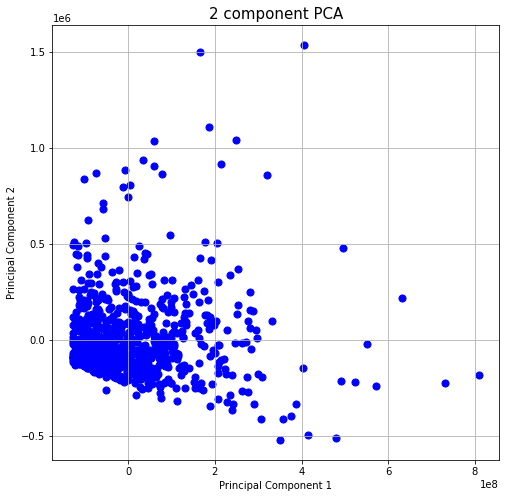

In [9]:
# Visualize 2 Dimensional data

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.scatter(df2.loc[:, 'principal component 1'],
               df2.loc[:, 'principal component 2'],
               c = 'blue',
               s = 50)

ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 15)
ax.grid()

From 5 features set, we are now dealing with only 2 features. These newly created features are also known as Principal Components (PC). 

The above plot tells us that the observations in the dataset can be grouped. Each data points in the data is a representing one movie. We could say that the clusters represent different movie. This dataset does not have a target variable by which to label these groups, so we do not know exactly what these labels are.

To visualize the reduced dataset with much greater granularity, I will perform density-based clustering.

### 4) You may need to normalise the attribute if necessary

`StandardScaler` transforms the data in such a manner that it has `mean as 0` and `standard deviation as 1`. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in a standard normal distribution. 

In [10]:
# Standardizing the features

normalized_data = StandardScaler().fit_transform(df2)

In [11]:
df3 = pd.DataFrame(data = normalized_data, columns = ['principal component 1', 'principal component 2'])
df3.head()

,principal component 1,principal component 2
0,0.502186,4.343581
1,-0.863926,4.012722
2,-0.823632,2.420828
3,-1.048503,2.441116
4,0.246030,0.935712


### 5) Show positive correlation between attributes if necessary

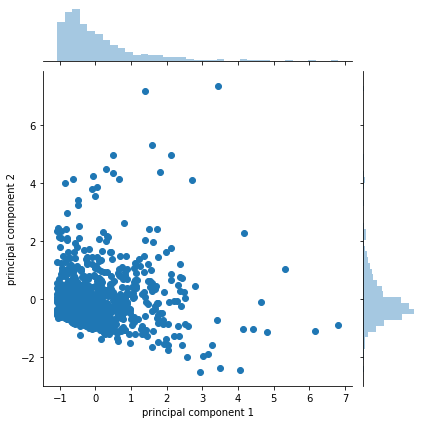

In [12]:
# Another data visualization using jointplot

sns.jointplot(x= "principal component 1", y="principal component 2", data=df3)

A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases. In this case, the above plot shows there is positive correlation between IMDb rating and revenue generated from each movie. Movie with high revenue has high IMDb rating at the same time.

### 6) Construct a Density-Based Clustering model and extract cluster labels and outliers to plot your results

`eps` is the maximum distance between two points. It is this distance that the algorithm uses to decide on whether to group the two points together. 

`min_samples` is minimum number of neighbors a given point should have in order to be classified as a core point.

The algorithm will starts with an arbitrary point (p point) and retrieve all points density-reachable from the p point with respect to `eps` and `min_samples` sets in the algorithm. If p point is a core point, it will result a cluster and if p point is a border point, no points are density-reachable from p point. Then the model visits the next point in the database.

DBSCAN works by determining whether the minimum number of points are close enough to one another to be considered part of a single cluster or otherwise. In simpler word, DBSCAN finds density-connected regions. 

#### Construct a Density-Based Clustering model using DBSCAN function with eps = 0.5

In [13]:
# Construct a density-based clustering model 

db = DBSCAN(eps=0.5, min_samples=10).fit(df3) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True

In [14]:
# Extract cluster labels and outliers

labels = db.labels_ 
df3['Cluster_ID'] = labels

Number of Cluster: 2
Cluster membership
 0    842
-1     52
Name: Cluster_ID, dtype: int64


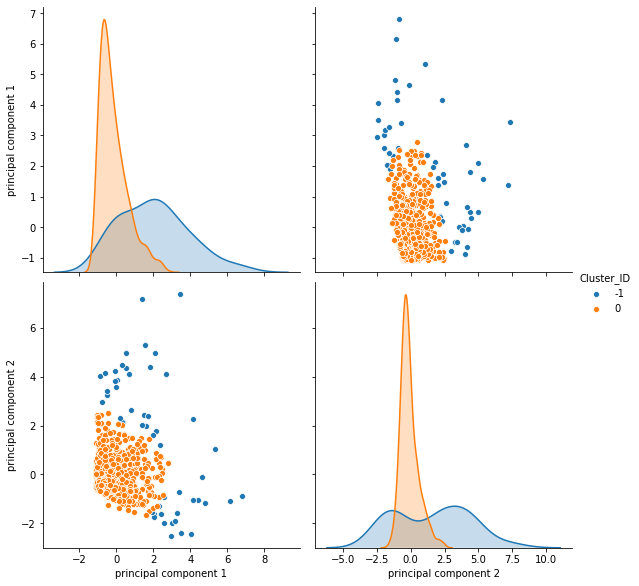

In [15]:
# Number of records are in each cluster
print("Number of Cluster:", len(df3['Cluster_ID'].value_counts()))
print("Cluster membership")
print(df3['Cluster_ID'].value_counts())

# Pairplot the cluster distribution.
cluster_db = sns.pairplot(df3, hue='Cluster_ID', height=4)
plt.show()

Number of cluster identified by the model is 2

#### Finding optimal epsilon value using k-distance

There is no general way of choosing minPts. However, a low minPts means it will build more clusters from noise, hence I maintain min_sample as 10.

I will calculate the distances of every point to its closest neighbour (k-distances) using the `NearestNeighbors` from `sklearn` library. The algorithm works by computing the distance between every point and all other points. These `k-distances` are then plotted in ascending order. The point where an elbow like bend corresponds to the optimal `eps` value. 

`metric` is the metric to use when calculating distance between instances in a feature array (i.e. euclidean distance).

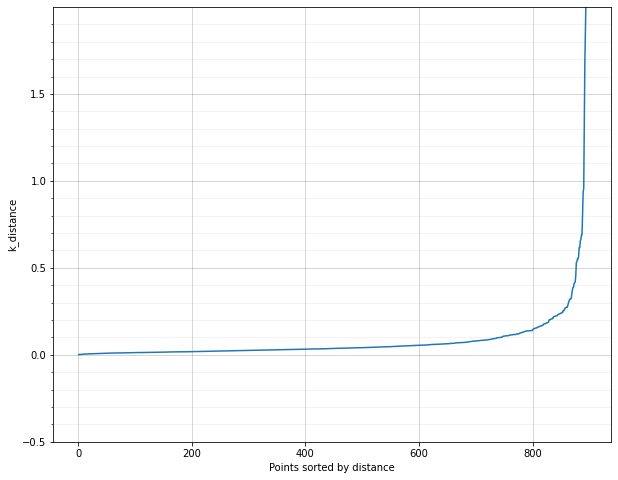

In [16]:
# Find k-distance and plot in ascending order

ns = 2
nbrs = NearestNeighbors(n_neighbors=ns, metric='euclidean').fit(df3)
distances, indices = nbrs.kneighbors(df3)
k_distance = sorted(distances[:,ns-1], reverse=False)    # sort the distance


fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(list(range(1,len(df3)+1)), k_distance)
plt.axis([None, None, -0.5, 2])
plt.xlabel ('Points sorted by distance')
plt.ylabel ('k_distance')

major_ticks = np.arange(-0.5, 2, 0.5)
minor_ticks = np.arange(-0.5, 2, 0.1)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.2, color='black')

The above graph shows a sharp change in the distance occurs at k_distance=0.15, and thus this point serves as a threshold.  0.15 is the optimal epsilon value for this data.

#### Construct a Density-Based Clustering model with optimal epsilon value, eps=0.15

In [20]:
# Construct a density-based clustering model

db = DBSCAN(eps=0.15, min_samples=10).fit(df3) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True

In [21]:
# Extract cluster labels and outliers

labels = db.labels_ 
df3['Cluster_ID'] = labels

Number of Cluster: 5
Cluster membership
 0    570
-1    294
 1     10
 3     10
 2     10
Name: Cluster_ID, dtype: int64


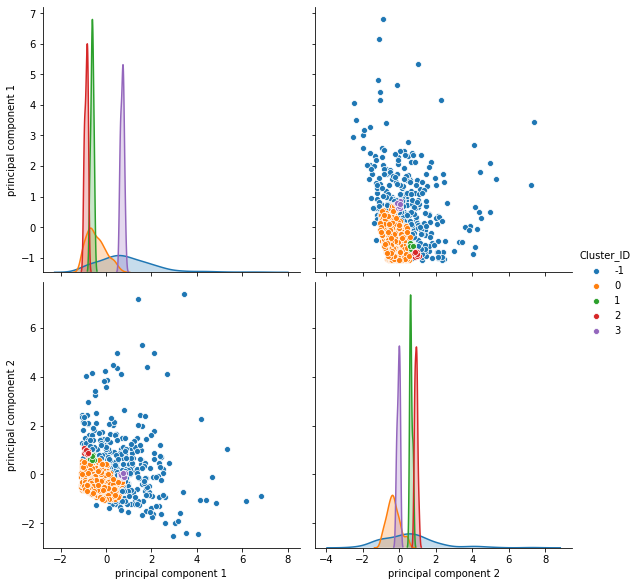

In [22]:
# Number of records are in each cluster
print("Number of Cluster:", len(df3['Cluster_ID'].value_counts()))
print("Cluster membership")
print(df3['Cluster_ID'].value_counts())

# Pairplot the cluster distribution.
cluster_db = sns.pairplot(df3, hue='Cluster_ID', height=4)
plt.show()

Number of cluster based on optimal epsilon value is 5. Unlike k-means, DBSCAN will figure out the number of clusters. DBSCAN is very sensitive to scale since epsilon is a fixed value for the maximum distance between two points. Different epsilon value yield different number of cluster. In this case, eps= 0.5 yield 2 clusters whereas if eps=0.15, the output is 5 clusters